<h1 style="text-align : center"> <font color="red" size=8>REGRESSION METRICS</h1>

## <font color="dark blue">WHAT IS EVALUATION METRICS?
- It is used to see the performance of our model. So that we can clear about our model that the model is best model / overfit model / underfit model.

## <font color="dark blue">WHAT IS REGRESSION METRICS?
- The Metrics used for evaluate the performance of Regression Model is known as Regression Metrics.
- Popular Regression Metrics are:
    > - __MAE__ $\rightarrow$ Mean Absolute Error
    > - __MSE__ $\rightarrow$ Mean Squared Error
    > - __RMSE__ $\rightarrow$ Root Meas Squared Error
    > - $ R^2 $ $\rightarrow$ R-Squared / Cofficient of Determination / Goodness of Fit
    > - $ Adjusted  \ R^2 $

## <font color="blue">a. MAE
- MAE stands for __Mean Absolute Error__.
- It is the absolute difference between Actual Value & predicted value.
- Absolute means taking the Positive Value.
$$ \large MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i| $$

### <font color="orange">ADVANTAGES
- It Robust to the Outliers.
- Unit is same as the variable unit.

### <font color="orange">DISADVANTAGES
- It is not differentiable.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"D:\DUDUL DS\CAMPUSX\ML\ALL METRICS\1. REGRESSION METRICS\placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

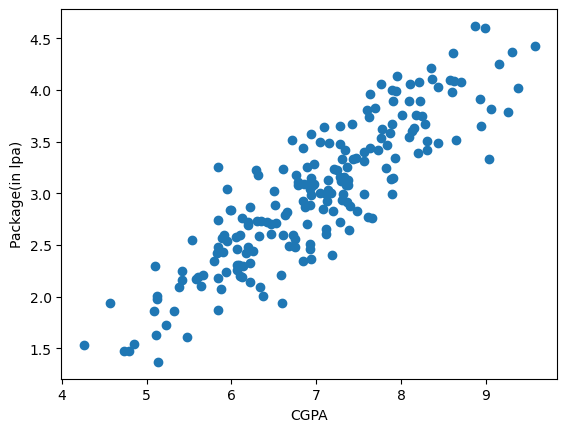

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

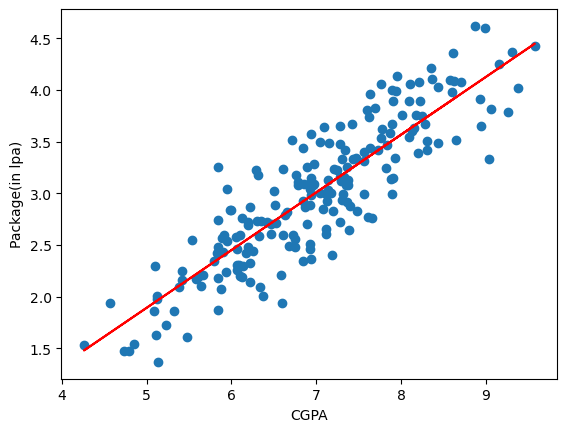

In [10]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [11]:
y_pred = lr.predict(X_test)

In [12]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


## <font color="blue">b. MSE
- MAE stands for __Mean Squared Error__.
- It is the average of squared difference between Actual Value & predicted value.
- It is most preferable metrics in Regression
$$ \large MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$

### <font color="orange">ADVANTAGES
- It is differentiable.

### <font color="orange">DISADVANTAGES
- It is affected by outliers.
- Unit comes in Square form.

In [15]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


## <font color="blue">c. RMSE
- MAE stands for __Root Mean Squared Error__.
- It is the Root-over of average of squared difference between Actual Value & predicted value.

$$ \large RMSE =  \sqrt [2] {\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} $$

### <font color="orange">ADVANTAGES
- It is differentiable.

### <font color="orange">DISADVANTAGES
- It is affected by outliers.

## <font color="dark green">NOTE
- MSE is a differentiable function. Hence it is a go to choice of Loss Function when compared to MAE.
- MSE is more sensitive to outliers.
- MAE, MSE, & RMSE are the measures of average deviation of predictions from the actual values.
- MAE, MSE & RMES are used to compare 2 or more models.

In [16]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


## <font color="blue">d. R-SQUARED
- It is also known as __Cofficient of Determination__.
- It is used to compare the model with simple mean model.

$$ \large  R^2   =  1- \frac{RSS}{TSS} $$
    
$$ \large OR $$
    
$$ \large  R^2  =  1- \frac{SS_\text{res}}{SS_\text{tot}}$$


> RSS or $ SS_\text{res} \rightarrow $ Sum of Squared Residual 
    
 $$ \large RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2  $$
    
> TSS or $ SS_\text{tot} \rightarrow $ Total Sum of Squared Error 
    
  $$ \large TSS = \sum_{i=1}^{n} (y_i - \overline{y}_i)^2  $$
    
   $$ \large y_i = Actual \ Value $$
    $$ \large \hat{y_i} = Predicted \ Value $$
    $$ \large \overline{y_i} = Mean \ of \ y_i's $$


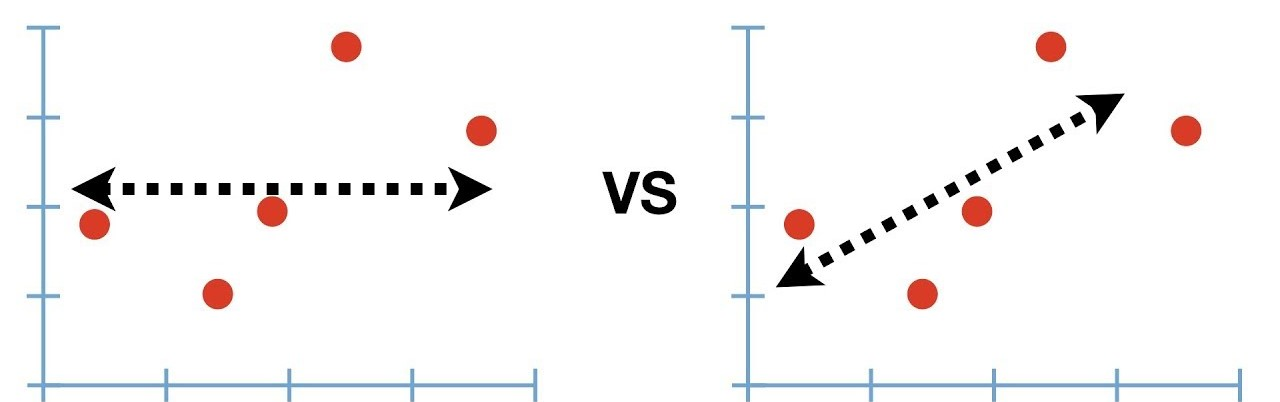

In [17]:
print("R-Squared",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R-Squared 0.780730147510384


## <font color="blue">e. ADJUSTED R-SQUARED
    
$$ \large \overline{R^2}  =  1-  [ \frac{(1-R^2) \times (n-1)}{(n-p-1)} ] $$
    
$$ \large n \rightarrow No.\ of \ Samples \ \ / \ rows \ in \ the \ dataset $$
    
$$ \large p \rightarrow No. \ of \ Independent \ features \ in \  the \  dataset $$

In [18]:
X_test.shape

(40, 1)

In [19]:
# No. of rows in the dataset
rows=X_test.shape[0]
rows

40

In [20]:
# No. of Independent Features in the dataset
ind_var=X_test.shape[1]
ind_var

1

In [21]:
1 - ((1-r2)*(rows-1)/(rows-ind_var-1))

0.7749598882343415

## <font color="dark green">IMPORATANT POINTS
- $ R^2 $ & $ \overline{R^2} $ are used for explaining how will the independent variables explains the variability in the dependent variable.

- $ R^2 $ always increases with addition of the independent variable which might lead to the existance of redundant variables in our model.
    
- $ Adjusted \ R^2 $ solves the above problem. The value of $ Adjusted \ R^2 $ decreases if the increase in the $ R^2 $ by the additional variable is not significant enough.
    
- For comparising different regression models, RMSE / MSE / MAE is a better choice than $ R^2 $ & $ \overline{R^2} $.

### 

# <font color="purple">COMPARE R-SQUARED & ADJUSTED R-SQUARE

## <font color="coral">1. ADDING UNWANTED FEATURE:

In [22]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.148372,3.26
1,5.12,0.959920,1.98
2,7.82,0.025579,3.25
3,7.42,0.366877,3.67
4,6.94,0.309221,3.57


Text(0, 0.5, 'Package(in lpa)')

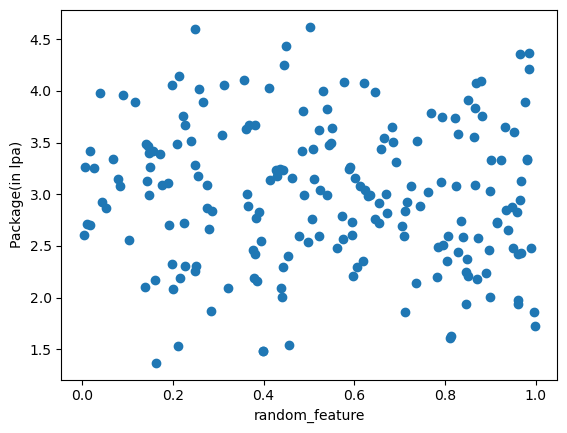

In [23]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [24]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7790087801329078


In [30]:
ad_r2=1 - ((1-r2)*(40-1)/(40-1-2))
print("Adjusted R2 score",ad_r2)

Adjusted R2 score 0.7670633087887406


### 

## <font color="coral">2. ADDING USEFUL FEATURE:

In [31]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [32]:
new_df2.sample(5)

,cgpa,iq,package
147,5.66,2.11,2.21
142,6.93,2.84,3.04
53,6.47,2.91,2.61
155,6.98,3.59,3.09
60,5.61,3.29,2.19


Text(0, 0.5, 'Package(in lpa)')

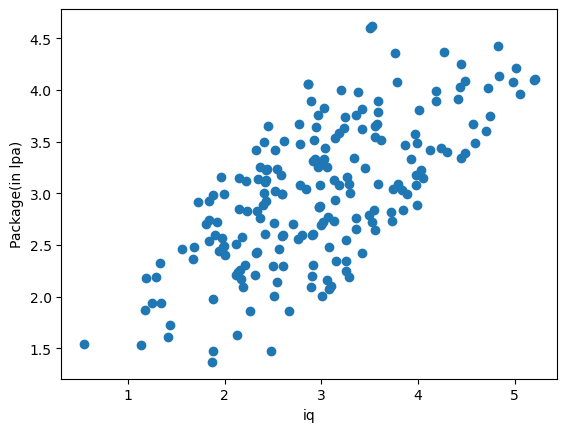

In [33]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [34]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [37]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8347562708477617


In [38]:
adj_r_sq=1 - ((1-r2)*(40-1)/(40-1-2))
print("Adjusted R2 score",adj_r_sq)

Adjusted R2 score 0.8258241773800732
